<a href="https://colab.research.google.com/github/Auzek2002/Brainiac_2024/blob/main/Brainiac_Azaan_Nabi_khan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libs:**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras import datasets,layers,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,GlobalAveragePooling2D
from zipfile import ZipFile
import os,glob
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from keras.models import Model
from keras.layers import BatchNormalization
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from imblearn.over_sampling import SMOTE

<ipython-input-2-ec921842cf36>:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


# **Loading the DataSet:**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 76 bytes


In [ ]:
!kaggle competitions download -c brainac24-ml-competition

  0% 0.00/70.8k [00:00<?, ?B/s]
100% 70.8k/70.8k [00:00<00:00, 75.7MB/s]


In [ ]:
file = "/content/brainac24-ml-competition.zip"
with ZipFile(file,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
df = pd.read_csv("/content/train_dataset.csv")

# **Exploaring the DataSet:**

In [ ]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,Y
0,30,241,45,596785,3/4/2014,IL,500/1000,2000,1104.50,0,...,2,NO,91650,14100,14100,63450,Accura,TL,2011,N
1,536,65,23,876699,12/12/1999,OH,250/500,1000,1099.95,0,...,0,YES,52400,6550,6550,39300,Accura,MDX,2005,Y
2,696,289,45,943425,10/28/1999,OH,250/500,2000,1221.41,0,...,1,NO,2700,300,300,2100,Honda,Accord,2006,N
3,558,63,26,550930,10/12/1995,IL,500/1000,500,1500.04,6000000,...,2,YES,5160,860,860,3440,Accura,TL,2004,N
4,837,257,43,797636,5/19/1992,IN,100/300,1000,974.84,0,...,1,YES,85320,21330,7110,56880,Nissan,Pathfinder,2006,N


In [ ]:
df.tail()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,Y
795,107,464,61,632627,10/7/1990,OH,500/1000,1000,1125.37,0,...,2,YES,79800,6650,19950,53200,Saab,95,2000,Y
796,271,369,55,577810,4/15/2013,OH,250/500,2000,1589.54,0,...,0,YES,85300,17060,8530,59710,Toyota,Highlander,2003,N
797,861,230,42,175960,11/16/2004,IN,100/300,1000,1023.11,0,...,2,YES,58850,10700,10700,37450,Accura,MDX,1999,N
798,436,102,28,810189,8/29/1999,OH,250/500,500,1075.41,0,...,0,NO,73400,7340,7340,58720,Dodge,Neon,1996,N
799,103,279,41,389238,6/6/2001,IL,250/500,500,1497.35,0,...,3,NO,28800,0,3600,25200,Ford,Fusion,2013,N


In [ ]:
df.shape

(800, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      800 non-null    int64  
 1   X1      800 non-null    int64  
 2   X2      800 non-null    int64  
 3   X3      800 non-null    int64  
 4   X4      800 non-null    object 
 5   X5      800 non-null    object 
 6   X6      800 non-null    object 
 7   X7      800 non-null    int64  
 8   X8      800 non-null    float64
 9   X9      800 non-null    int64  
 10  X10     800 non-null    int64  
 11  X11     800 non-null    object 
 12  X12     800 non-null    object 
 13  X13     800 non-null    object 
 14  X14     800 non-null    object 
 15  X15     800 non-null    object 
 16  X16     800 non-null    int64  
 17  X17     800 non-null    int64  
 18  X18     800 non-null    object 
 19  X19     800 non-null    object 
 20  X20     800 non-null    object 
 21  X21     800 non-null    object 
 22  X2

In [ ]:
df.describe()

,ID,X1,X2,X3,X7,X8,X9,X10,X16,X17,X26,X27,X29,X30,X32,X33,X34,X35,X38
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,8.000000e+02,800.000000,800.00000,800.00000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,498.418750,206.655000,39.172500,550103.858750,1141.250000,1257.474875,1.151250e+06,500722.883750,25403.25000,-27255.75000,11.64500,1.815000,1.000000,1.478750,53282.662500,7529.962500,7465.737500,38286.962500,2004.953750
std,289.511545,114.015812,9.073348,258016.900142,613.815444,248.817871,2.354316e+06,71679.968878,28073.79092,28137.60336,6.99948,1.013439,0.820574,1.120767,26525.045525,4921.045924,4826.501383,18964.869318,5.999091
min,1.000000,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.00000,-111100.00000,0.00000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,242.750000,120.750000,32.000000,337547.250000,500.000000,1083.700000,0.000000e+00,447466.250000,0.00000,-52350.00000,6.00000,1.000000,0.000000,0.000000,42805.000000,4420.000000,4602.500000,31115.000000,2000.000000
50%,494.500000,206.500000,39.000000,547773.000000,1000.000000,1257.200000,0.000000e+00,466176.000000,0.00000,-27650.00000,12.00000,1.000000,1.000000,1.000000,58300.000000,6845.000000,6805.000000,42370.000000,2005.000000
75%,751.250000,280.000000,45.000000,767013.500000,2000.000000,1422.657500,0.000000e+00,603251.000000,51400.00000,0.00000,17.25000,3.000000,2.000000,2.000000,71212.500000,11380.000000,10860.000000,51177.500000,2010.000000
max,1000.000000,479.000000,64.000000,998865.000000,2000.000000,2047.590000,1.000000e+07,620869.000000,98800.00000,0.00000,23.00000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


# **Checking for Null Values:**

In [ ]:
df.isnull().sum()

ID      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22    72
X23     0
X24     0
X25     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
X33     0
X34     0
X35     0
X36     0
X37     0
X38     0
Y       0
dtype: int64

In [ ]:
df['X22']

0      Police
1       Other
2      Police
3      Police
4      Police
        ...  
795    Police
796    Police
797     Other
798    Police
799      Fire
Name: X22, Length: 800, dtype: object

In [ ]:
df['X22'].unique()

array(['Police', 'Other', 'Ambulance', nan, 'Fire'], dtype=object)

# **Removing Missing Values:**

In [ ]:
df['X22'].fillna(value=df['X22'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
Y      0
dtype: int64

# **Checking if Data is balanced:**

In [ ]:
df['Y'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df['Y'].value_counts()

Y
N    608
Y    192
Name: count, dtype: int64

<Axes: xlabel='Y', ylabel='count'>

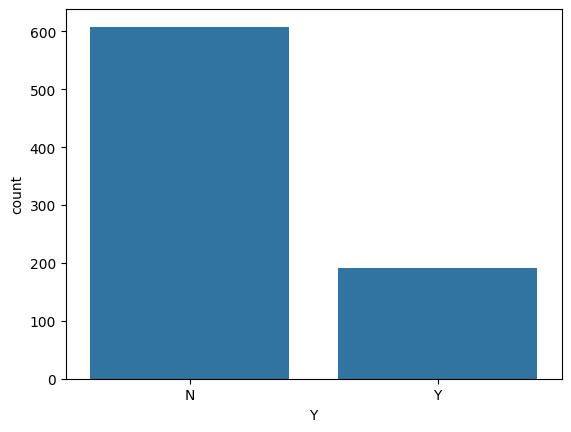

In [ ]:
sns.countplot(x='Y',data=df)

# **Data is not balanced**

# **Lable Encoding:**

In [ ]:
encoder = LabelEncoder()

In [ ]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,Y
0,30,241,45,596785,3/4/2014,IL,500/1000,2000,1104.50,0,...,2,NO,91650,14100,14100,63450,Accura,TL,2011,N
1,536,65,23,876699,12/12/1999,OH,250/500,1000,1099.95,0,...,0,YES,52400,6550,6550,39300,Accura,MDX,2005,Y
2,696,289,45,943425,10/28/1999,OH,250/500,2000,1221.41,0,...,1,NO,2700,300,300,2100,Honda,Accord,2006,N
3,558,63,26,550930,10/12/1995,IL,500/1000,500,1500.04,6000000,...,2,YES,5160,860,860,3440,Accura,TL,2004,N
4,837,257,43,797636,5/19/1992,IN,100/300,1000,974.84,0,...,1,YES,85320,21330,7110,56880,Nissan,Pathfinder,2006,N


In [ ]:
df.drop(columns=['ID'],inplace=True,axis=1)

In [ ]:
cols = df.columns

In [ ]:
cols

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'Y'],
      dtype='object')

In [ ]:
for col in cols:
  if df[col].dtype == 'O':
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])

In [ ]:
df.shape

(800, 39)

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,Y
0,241,45,596785,375,0,2,2000,1104.50,0,432211,...,2,1,91650,14100,14100,63450,0,33,2011,0
1,65,23,876699,204,2,1,1000,1099.95,0,473109,...,0,2,52400,6550,6550,39300,0,23,2005,1
2,289,45,943425,106,2,1,2000,1221.41,0,466289,...,1,1,2700,300,300,2100,6,6,2006,0
3,63,26,550930,68,0,2,500,1500.04,6000000,613826,...,2,2,5160,860,860,3440,0,33,2004,0
4,257,43,797636,467,1,0,1000,974.84,0,468984,...,1,2,85320,21330,7110,56880,9,29,2006,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      800 non-null    int64  
 1   X2      800 non-null    int64  
 2   X3      800 non-null    int64  
 3   X4      800 non-null    int64  
 4   X5      800 non-null    int64  
 5   X6      800 non-null    int64  
 6   X7      800 non-null    int64  
 7   X8      800 non-null    float64
 8   X9      800 non-null    int64  
 9   X10     800 non-null    int64  
 10  X11     800 non-null    int64  
 11  X12     800 non-null    int64  
 12  X13     800 non-null    int64  
 13  X14     800 non-null    int64  
 14  X15     800 non-null    int64  
 15  X16     800 non-null    int64  
 16  X17     800 non-null    int64  
 17  X18     800 non-null    int64  
 18  X19     800 non-null    int64  
 19  X20     800 non-null    int64  
 20  X21     800 non-null    int64  
 21  X22     800 non-null    int64  
 22  X2

# **Check Correlation**

<Axes: >

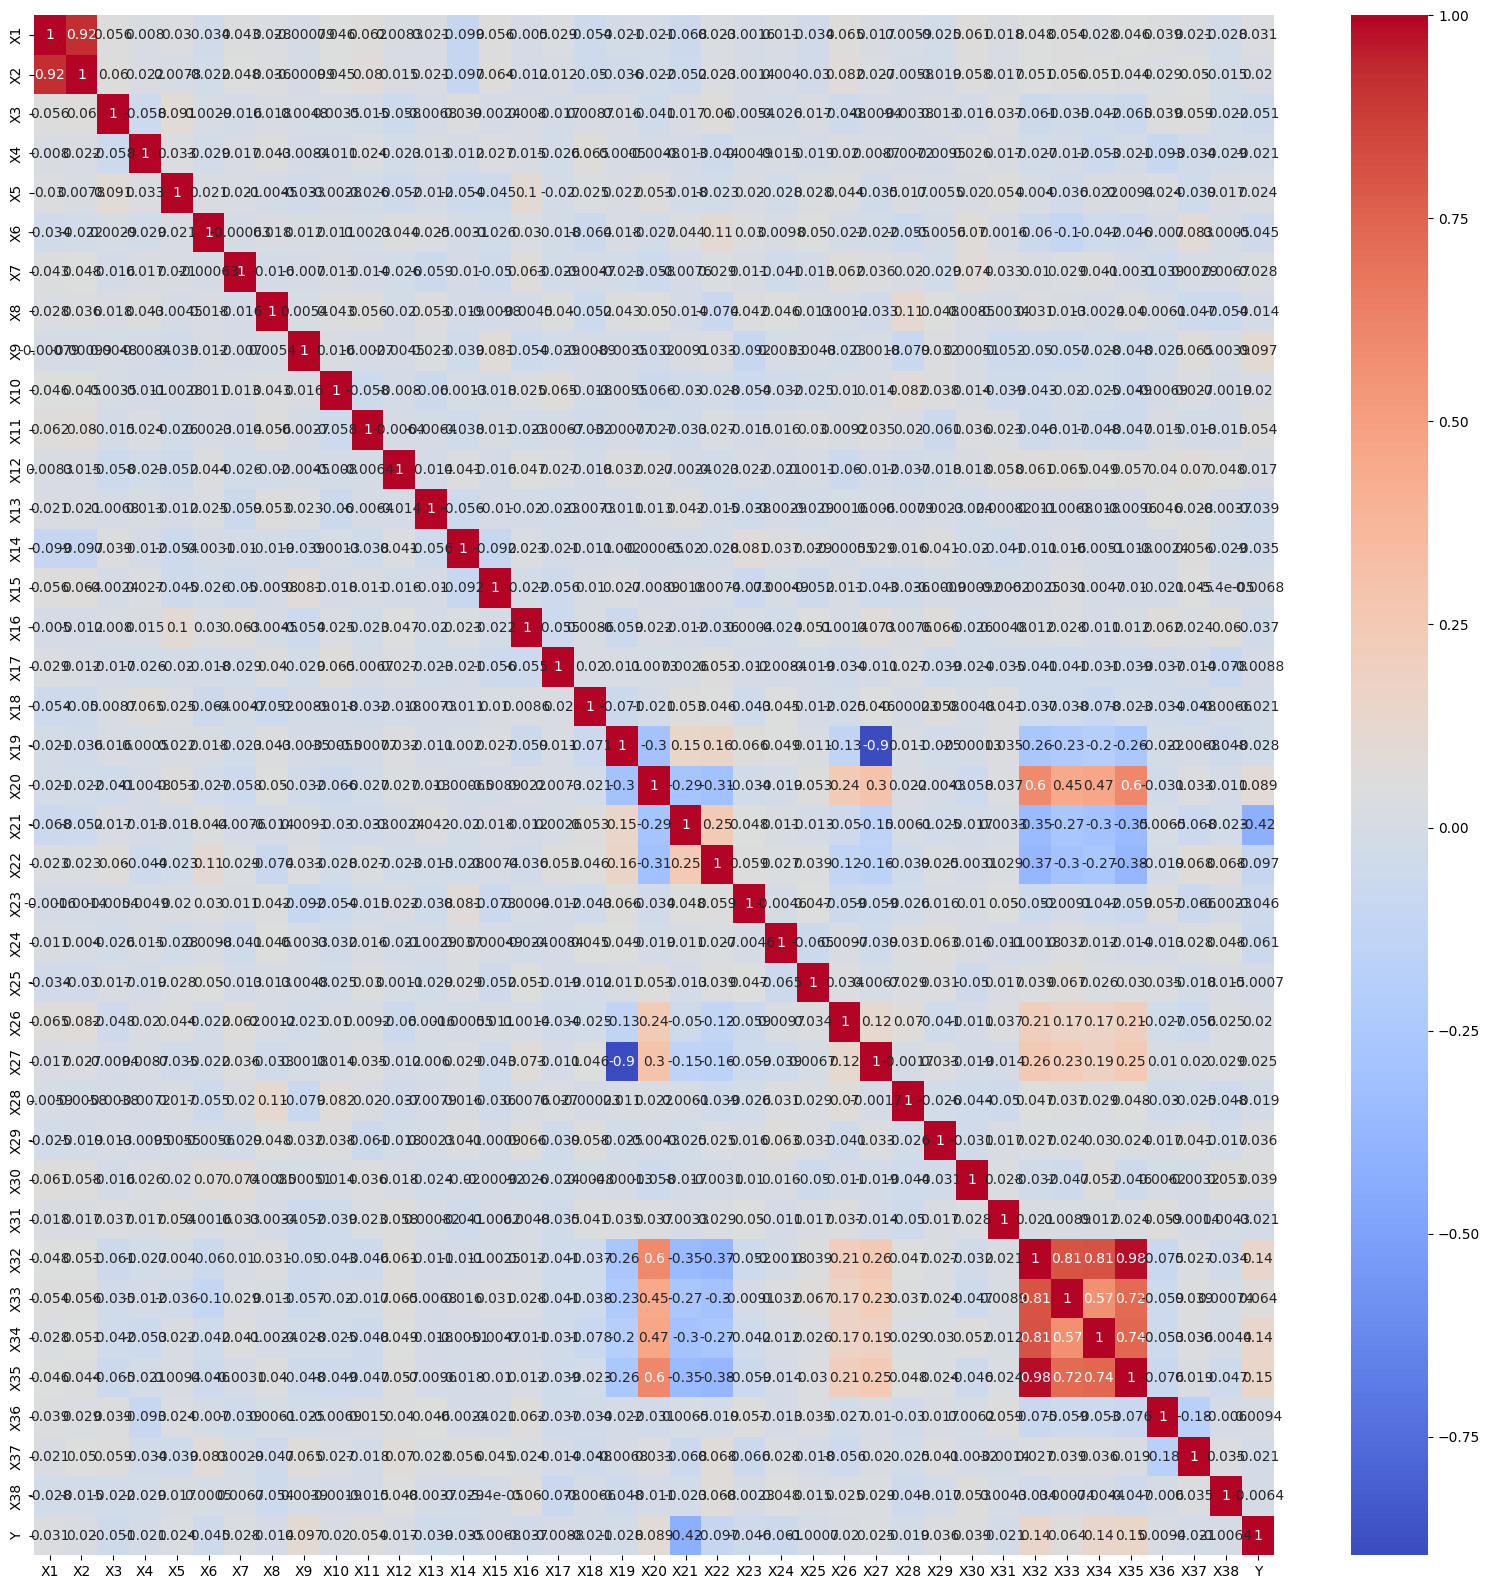

In [ ]:
corr = df.corr()
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot = True , cmap = "coolwarm")

# **Checking for Feature Importance:**

In [ ]:
x = df.drop(['Y'],axis=1)
y = df['Y']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(x_train, y_train)
X_train_fs = fs.transform(x_train)
X_test_fs = fs.transform(x_test)

Feature 0: 0.014938
Feature 1: 0.003631
Feature 2: 0.000000
Feature 3: 0.015294
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.005882
Feature 8: 0.004776
Feature 9: 0.004809
Feature 10: 0.014108
Feature 11: 0.011219
Feature 12: 0.000000
Feature 13: 0.036990
Feature 14: 0.011886
Feature 15: 0.007554
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.006490
Feature 19: 0.044483
Feature 20: 0.123787
Feature 21: 0.014592
Feature 22: 0.007218
Feature 23: 0.014089
Feature 24: 0.000000
Feature 25: 0.006779
Feature 26: 0.003460
Feature 27: 0.017952
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.005818
Feature 31: 0.008014
Feature 32: 0.053238
Feature 33: 0.026180
Feature 34: 0.000000
Feature 35: 0.009763
Feature 36: 0.000000
Feature 37: 0.012946


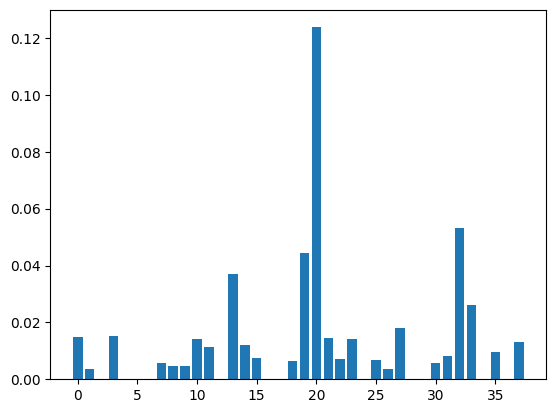

In [ ]:
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'Y'],
      dtype='object')

In [ ]:
#features to keep: 3,5,10,12,13,15,20,25,26,29,31,32,33,37
#features to remove: 0,1,2,4,6,7,8,9,11,14,16,17,18,19,21,22,23,24,27,28,30,34,35,36
dropped_cols =  ['X1','X2','X3','X5','X7','X8','X9','X10','X12','X15','X17','X18','X19','X20','X22','X23','X24','X25','X28','X29','X31','X35','X36','X37']
df_dropped = df

In [ ]:
df_dropped.drop(columns=dropped_cols,inplace=True,axis=1)

In [ ]:
x_dropped = df_dropped.drop(['Y'],axis=1)
y_dropped = df_dropped['Y']

# **Solving Imbalance Problem**

In [ ]:
x_sampled, y_sampled = SMOTE().fit_resample(x_dropped,y_dropped)

In [ ]:
y_sampled.value_counts()

Y
0    608
1    608
Name: count, dtype: int64

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=3)
print(f"Shape of x_train: {x_train.shape}, Shape of x_test: {x_test.shape}, Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

Shape of x_train: (972, 14), Shape of x_test: (244, 14), Shape of y_train: (972,), Shape of y_test: (244,)


# **Scaling the Data:**

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train.head()

,X4,X6,X11,X13,X14,X16,X21,X26,X27,X30,X32,X33,X34,X38
654,755,1,1,3,1,65300,1,16,1,1,78120,17360,8680,2006
266,753,1,1,1,15,0,1,9,1,1,7080,1180,1180,2001
1145,626,0,0,4,13,0,0,10,2,1,53478,5480,10296,2013
873,288,1,0,3,8,45102,0,15,3,1,40815,3791,6691,2003
806,262,2,1,11,2,72071,0,13,2,1,57520,5076,10153,1999


In [ ]:
x_test.head()

,X4,X6,X11,X13,X14,X16,X21,X26,X27,X30,X32,X33,X34,X38
201,616,1,0,10,8,0,0,23,3,0,38610,3510,3510,2007
539,594,0,0,2,16,69200,0,23,3,0,44880,8160,4080,2004
976,316,0,1,10,5,0,1,8,2,0,77311,14056,7028,1998
1154,133,1,1,5,17,0,0,1,1,1,79725,7044,16321,2000
97,313,0,0,3,4,0,0,22,3,0,69680,8710,8710,2008


In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[ 1.82268346,  0.21268339,  1.26174482, ...,  2.10792741,
         0.19686105,  0.23360302],
       [ 1.81299432,  0.21268339,  1.26174482, ..., -1.34626928,
        -1.39926173, -0.65059532],
       [ 1.19773436, -1.0874943 , -0.79255328, ..., -0.42828129,
         0.54077231,  1.47148069],
       ...,
       [ 1.66281276,  0.21268339,  1.26174482, ...,  1.23690624,
         1.17581636, -0.12007632],
       [-1.07921194,  1.51286107, -0.79255328, ..., -0.11296308,
         2.79130543, -1.18111432],
       [-1.28268374,  0.21268339, -0.79255328, ..., -0.03674873,
        -0.09384611,  1.47148069]])

In [ ]:
x_test

array([[ 1.1492887 ,  0.21268339, -0.79255328, ..., -0.84884788,
        -0.90339958,  0.41044268],
       [ 1.04270823, -1.0874943 , -0.79255328, ...,  0.14386007,
        -0.78209425, -0.12007632],
       [-0.30408128, -1.0874943 ,  1.26174482, ...,  1.40257105,
        -0.15471159, -1.18111432],
       ...,
       [-0.84667275,  0.21268339, -0.79255328, ..., -0.19985171,
        -0.25643782,  0.05676335],
       [ 0.06895034,  0.21268339, -0.79255328, ..., -0.94278153,
        -0.34369253,  1.82516002],
       [ 0.49042764,  0.21268339, -0.79255328, ...,  0.32382841,
        -0.97171364, -0.12007632]])

In [ ]:
x_train.max()

3.386978450440351

In [ ]:
x_train.min()

-2.1529224324648744

In [ ]:
x_test.max()

2.955465159838472

In [ ]:
x_test.min()

-2.0521886966911977

# **SVC:**

In [ ]:
svc_best_model = SVC(C=0.1,kernel='linear')
svc_best_model.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred_svc_d= svc_best_model.predict(x_train)

In [ ]:
print(f"Training Data Accuracy for SVC: {accuracy_score(y_train,y_pred_svc_d)}")
y_pred_svc_d_t = svc_best_model.predict(x_test)
print(f"Testing Data Accuracy for SVC: {accuracy_score(y_test,y_pred_svc_d_t)}")

Training Data Accuracy for SVC: 0.7870370370370371
Testing Data Accuracy for SVC: 0.8114754098360656


# **Decision Trees**

In [ ]:
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=3)
dt_grid_search.fit(x_train, y_train)
print("Best Decision Tree parameters:", dt_grid_search.best_params_)
dt_best_model = dt_grid_search.best_estimator_

Best Decision Tree parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
y_pred_dt_d = dt_best_model.predict(x_train)

In [ ]:
print(f"Training Data Accuracy for DT: {accuracy_score(y_train,y_pred_dt_d)}")
y_pred_dt_d_t = dt_best_model.predict(x_test)
print(f"Testing Data Accuracy for DT: {accuracy_score(y_test,y_pred_dt_d_t)}")

Training Data Accuracy for DT: 0.8539094650205762
Testing Data Accuracy for DT: 0.8647540983606558


# **Random Forest:**

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
print("Best Decision Tree parameters:", grid_search.best_params_)
rf_best_model = grid_search.best_estimator_

Best Decision Tree parameters: {'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}


In [ ]:
y_pred_rf_d = rf_best_model.predict(x_train)

In [ ]:
print(f"Training Data Accuracy for RF: {accuracy_score(y_train,y_pred_rf_d)}")
y_pred_rf_d_t = rf_best_model.predict(x_test)
print(f"Testing Data Accuracy for RF: {accuracy_score(y_test,y_pred_rf_d_t)}")

Training Data Accuracy for RF: 0.845679012345679
Testing Data Accuracy for RF: 0.889344262295082


# **Naive Bayes**

In [ ]:
nb_param_grid = {}
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=3)
nb_grid_search.fit(x_train, y_train)
print("Best Naive Bayes parameters:", nb_grid_search.best_params_)
nb_best_model = nb_grid_search.best_estimator_

Best Naive Bayes parameters: {}


In [ ]:
y_pred_nb_d = nb_best_model.predict(x_train)

In [ ]:
print(f"Training Data Accuracy for NB: {accuracy_score(y_train,y_pred_nb_d)}")
y_pred_nb_d_t = nb_best_model.predict(x_test)
print(f"Testing Data Accuracy for NB: {accuracy_score(y_test,y_pred_nb_d_t)}")

Training Data Accuracy for NB: 0.7664609053497943
Testing Data Accuracy for NB: 0.7622950819672131


# **Stacking Models**

In [ ]:
estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC())
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(x_train, y_train)
stacking_pred = stacking_model.predict(x_train)
stacking_pred_t = stacking_model.predict(x_test)
stacking_accuracy = accuracy_score(y_train, stacking_pred)
stacking_accuracy_t = accuracy_score(y_test, stacking_pred_t)
print("Stacking Models Accuracy on Training:", stacking_accuracy)
print("Stacking Models Accuracy on Testing:", stacking_accuracy_t)

Stacking Models Accuracy on Training: 1.0
Stacking Models Accuracy on Testing: 0.8770491803278688


# **KNN**

In [ ]:
neighbor = np.arange(1,10,1)
for n in neighbor:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train,y_train)
  y_pred_knn = knn.predict(x_train)
  print(f"FOR NEIGHBOR = {n}")
  print(f"Training Data Accuracy for KNN (neighbors: {n}): {accuracy_score(y_train,y_pred_knn)}")
  print('\n')
  y_pred_knn_t = knn.predict(x_test)
  print(f"Testing Data Accuracy for KNN (neighbors: {n}): {accuracy_score(y_test,y_pred_knn_t)}")
  print('\n\n')

FOR NEIGHBOR = 1
Training Data Accuracy for KNN (neighbors: 1): 1.0


Testing Data Accuracy for KNN (neighbors: 1): 0.7991803278688525



FOR NEIGHBOR = 2
Training Data Accuracy for KNN (neighbors: 2): 0.9763374485596708


Testing Data Accuracy for KNN (neighbors: 2): 0.8032786885245902



FOR NEIGHBOR = 3
Training Data Accuracy for KNN (neighbors: 3): 0.9032921810699589


Testing Data Accuracy for KNN (neighbors: 3): 0.8237704918032787



FOR NEIGHBOR = 4
Training Data Accuracy for KNN (neighbors: 4): 0.9084362139917695


Testing Data Accuracy for KNN (neighbors: 4): 0.8442622950819673



FOR NEIGHBOR = 5
Training Data Accuracy for KNN (neighbors: 5): 0.8621399176954733


Testing Data Accuracy for KNN (neighbors: 5): 0.8114754098360656



FOR NEIGHBOR = 6
Training Data Accuracy for KNN (neighbors: 6): 0.8672839506172839


Testing Data Accuracy for KNN (neighbors: 6): 0.8237704918032787



FOR NEIGHBOR = 7
Training Data Accuracy for KNN (neighbors: 7): 0.8189300411522634


Testing Data

# **XGBoost**

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)

In [ ]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.2,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xg = xgb_classifier.predict(x_train)

In [ ]:
print(f"Accuracy for training data: {accuracy_score(y_train,y_pred_xg)}")
y_pred_xg_t = xgb_classifier.predict(x_test)
print(f"Accuracy for testing data: {accuracy_score(y_test,y_pred_xg_t)}")

Accuracy for training data: 1.0
Accuracy for testing data: 0.8688524590163934


# **Neural Nets**

In [ ]:
from sklearn.neural_network import MLPClassifier
np.random.seed(1)
np.set_printoptions(precision=4, suppress=True)
params = { 'hidden_layer_sizes' : [10,10],
    'activation' : 'tanh',
    'solver' : 'sgd',
    'alpha' : 0.0,
    'batch_size' : 10,
    'random_state' : 1,
    'tol' : 0.0001,
    'nesterovs_momentum' : False,
    'learning_rate' : 'constant',
    'learning_rate_init' : 0.01,
    'max_iter' : 1000,
    'shuffle' : True,
    'n_iter_no_change' : 90,
    'verbose' : False }
net = MLPClassifier(**params)
net.fit(x_train, y_train)
acc_train = net.score(x_train, y_train)
print("\nAccuracy on train = %0.4f " % acc_train)
acc_test = net.score(x_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)


Accuracy on train = 0.9938 
Accuracy on test = 0.7992 


# **Using Random Forest for predictions:**

In [ ]:
# x_sampled, y_sampled
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_sampled)
rf_best_model.fit(x_scaled,y_sampled)

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)

In [ ]:
y_pred_rf_d = rf_best_model.predict(x_train)
print(f"Training Data Accuracy for RF: {accuracy_score(y_train,y_pred_rf_d)}")
y_pred_rf_d_t = rf_best_model.predict(x_test)
print(f"Testing Data Accuracy for RF: {accuracy_score(y_test,y_pred_rf_d_t)}")

Training Data Accuracy for RF: 0.8446502057613169
Testing Data Accuracy for RF: 0.889344262295082


In [ ]:
df_test = pd.read_csv("/content/test_dataset.csv")

In [ ]:
df_test.isnull().sum()

ID      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22    19
X23     0
X24     0
X25     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
X33     0
X34     0
X35     0
X36     0
X37     0
X38     0
dtype: int64

In [ ]:
df_test['X22']

0      Ambulance
1      Ambulance
2          Other
3         Police
4         Police
         ...    
195         Fire
196          NaN
197       Police
198       Police
199          NaN
Name: X22, Length: 200, dtype: object

In [ ]:
df_test['X22'].fillna(value=df_test['X22'].mode()[0],inplace=True)

In [ ]:
encoder = LabelEncoder()

In [ ]:
cols = df_test.columns

In [ ]:
for col in cols:
  if df_test[col].dtype == 'O':
    encoder.fit(df_test[col])
    df_test[col] = encoder.transform(df_test[col])

In [ ]:
cols = ['ID','X1','X2','X3','X5','X7','X8','X9','X10','X12','X15','X17','X18','X19','X20','X22','X23','X24','X25','X28','X29','X31','X35','X36','X37']
x_final = df_test.drop(cols,axis=1)

In [ ]:
scaler = StandardScaler()
x_final = scaler.fit_transform(x_final)

In [ ]:
dt_best_model.fit(x_scaled,y_sampled)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [ ]:
y_preds_sub_dt = dt_best_model.predict(x_final)

In [ ]:
y_preds_sub_rf = rf_best_model.predict(x_final)

In [ ]:
new_df = pd.DataFrame(data=df_test['ID'],columns=['ID'])

In [ ]:
new_df

,ID
0,522
1,738
2,741
3,661
4,412
...,...
195,409
196,333
197,209
198,614


In [ ]:
new_df['Y'] = y_preds_sub_rf

In [ ]:
new_df.tail(20)

,ID,Y
180,495,1
181,671,0
182,378,0
183,527,1
184,846,1
185,138,0
186,356,0
187,366,1
188,943,0
189,750,0


In [ ]:
d = {0 : "N", 1: "Y"}
new_df['Y']=new_df['Y'].map(d)

In [ ]:
new_df.head(20)

,ID,Y
0,522,N
1,738,N
2,741,N
3,661,N
4,412,N
5,679,N
6,627,Y
7,514,Y
8,860,N
9,137,N


In [ ]:
new_df.to_csv('/content/prediction2.0.csv',index=False)